# Image Classification

In [ ]:
Dataset Source:https://www.kaggle.com/datasets/dineshpiyasamara/geometric-shapes-dataset
About the Dataset:
    size: 27.5MB
        subfolder: Circle, Triangle, Square (with 10000 images in each)

### Importing necessary libraries

In [2]:
import os
import random
import numpy as np
import pandas as pd
import split_folder
import pathlib

import seaborn as sns
from  matplotlib import pyplot as plt
from matplotlib import image as img 

import keras_tuner
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

### Assigning variable to subfolders

In [3]:
image_directory = 'C:/Users/Hasan/Desktop/Classification/geometric shapes dataset/Circle'
image_directory2 = 'C:/Users/Hasan/Desktop/Classification/geometric shapes dataset/Triangle'
image_directory3 = 'C:/Users/Hasan/Desktop/Classification/geometric shapes dataset/Square'

In [ ]:
### 

In [4]:
image_file = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
image_file2 = [os.path.join(image_directory2, filename) for filename in os.listdir(image_directory2)]
image_file3 = [os.path.join(image_directory3, filename) for filename in os.listdir(image_directory3)]

### Ploting few samples from image_files

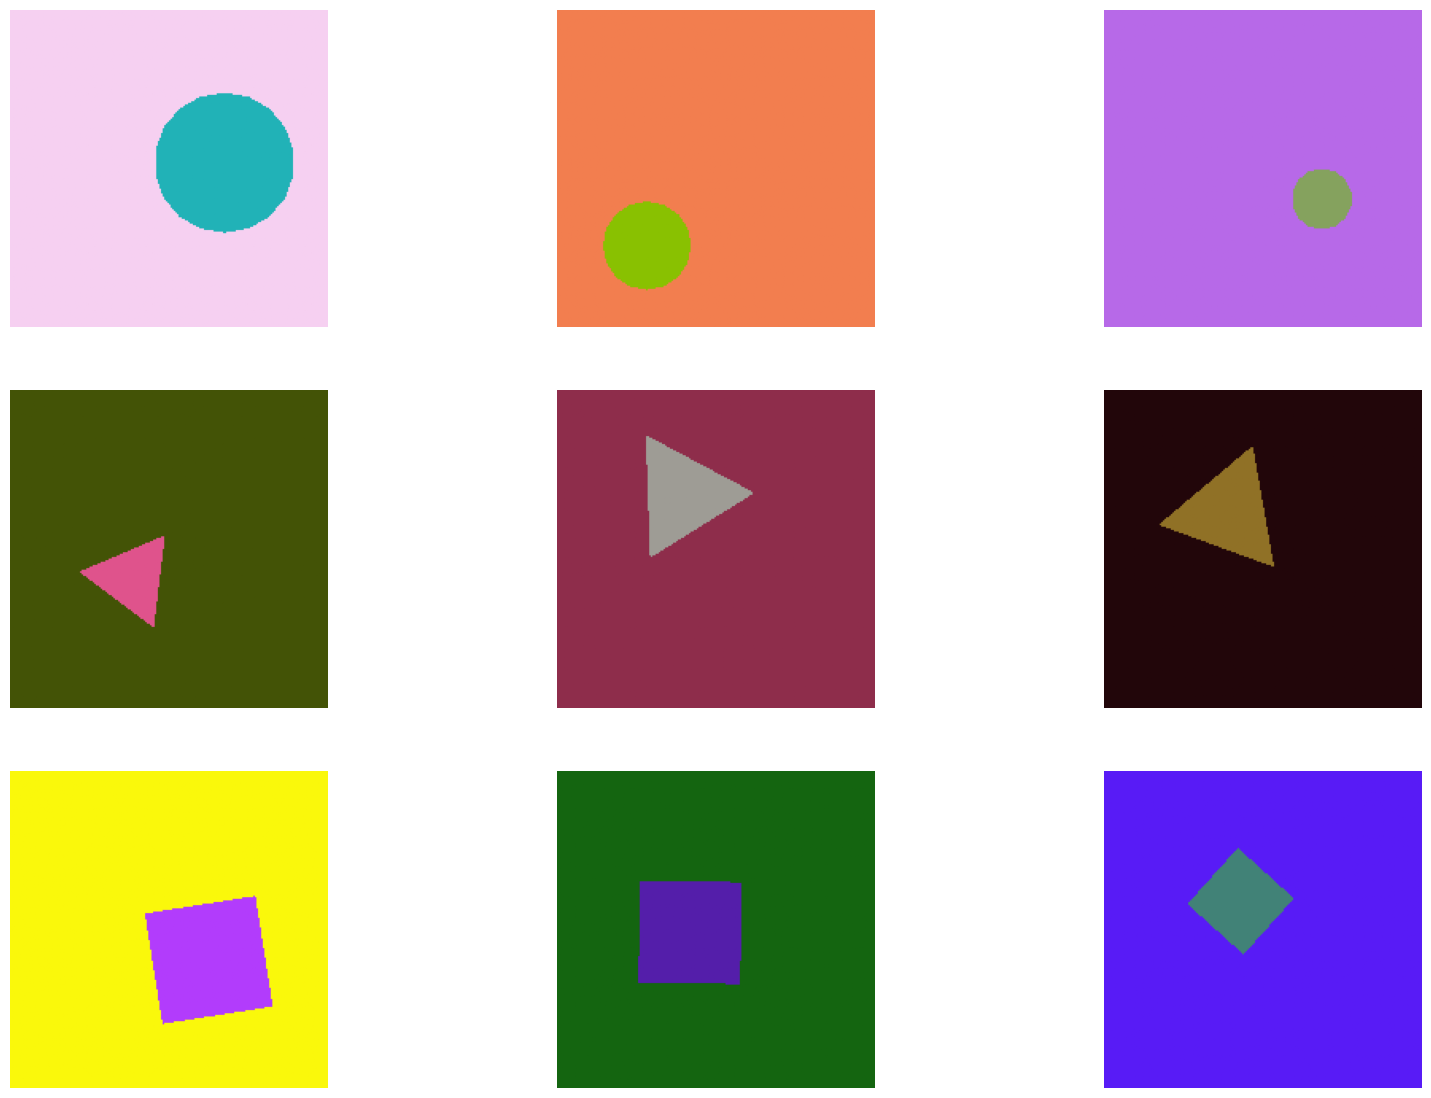

In [5]:
sample_image = random.sample(image_file , 3)
sample_image2 = random.sample(image_file2, 3)
sample_image3 = random.sample(image_file3, 3)

fig,axes = plt.subplots(3,3, figsize =(20,14) )

for i , image_path in enumerate(sample_image):
    ax = axes[0,i]
    image = img.imread(image_path)
    ax.imshow(image)
    ax.axis('off')

for i , image_path in enumerate(sample_image2):
    ax = axes[1,i]
    image = img.imread(image_path)
    ax.imshow(image)
    ax.axis('off')

for i , image_path in enumerate(sample_image3):
    ax = axes[2,i]
    image = img.imread(image_path)
    ax.imshow(image)
    ax.axis('off')    
    
plt.show()

### Data spliting

In [4]:
root_path = 'C:/Users/Hasan/Desktop/Classification/geometric shapes dataset'
root_path = pathlib.Path(root_path)
#split train_test_validation set
split_folder.ratio(input=root_path , output='split_image', seed = 42, ratio=(0.7,0.15,0.15))


Copying (7000) of .. train/Circle



  0%|          | 0/7000 [00:00<?, ?it/s]


Copying (1500) of .. val/Circle



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (1500) of .. test/Circle



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (7000) of .. train/Square



  0%|          | 0/7000 [00:00<?, ?it/s]


Copying (1500) of .. val/Square



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (1500) of .. test/Square



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (7000) of .. train/Triangle



  0%|          | 0/7000 [00:00<?, ?it/s]


Copying (1500) of .. val/Triangle



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (1500) of .. test/Triangle



  0%|          | 0/1500 [00:00<?, ?it/s]

### Loading images into train_set

In [21]:
train_data = keras.utils.image_dataset_from_directory(directory='C:/Users/Hasan/Image Classification/split_image/train',
                                                      labels='inferred',label_mode='int',color_mode='rgb',
                                                      batch_size=2, image_size=(64,64), shuffle=True)


Found 21000 files belonging to 3 classes.


### Loading images into validation_set

In [22]:
validation_data = keras.utils.image_dataset_from_directory(directory='C:/Users/Hasan/Image Classification/split_image/val',
                                                           labels='inferred', label_mode='int',
                                                           color_mode='rgb',batch_size=2,
                                                           shuffle=True,image_size=(64,64))


Found 4500 files belonging to 3 classes.


### Loading images into test_set

In [23]:
test_data = keras.utils.image_dataset_from_directory(directory='C:/Users/Hasan/Image Classification/split_image/test',
                                                     labels='inferred', label_mode='int',color_mode='rgb',
                                                     batch_size=2, image_size=(64,64),shuffle=True)


Found 4500 files belonging to 3 classes.


### Data normalization


In [24]:
def Normalization(image, label):
    image = tensorflow.cast(image/64, dtype='float32')
    return image, label

train_data = train_data.map(Normalization)
validation_data = validation_data.map(Normalization)
test_data = test_data.map(Normalization)

## Model Building

In [30]:
# Define the learning rate scheduler
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9
)

# Define the model architecture
model = keras.Sequential([
    # Input layer
    keras.Input(shape=(64,64, 3)),
    
    # Convolutional layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output from the previous layer
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    
    # Output layer with softmax activation (3 classes)
    layers.Dense(3, activation='softmax')
])

# Compile the model with the custom learning rate
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10  # You can adjust the number of epochs
)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 6, 6, 128)        

### Evaluating model on Test Data

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Predict the labels on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# True labels of the test data
true_labels = np.concatenate([y for x, y in test_data], axis=0)


2250/2250 [==============================] - 15s 7ms/step - loss: 0.0589 - accuracy: 0.9773
Test accuracy: 97.73%
2250/2250 [==============================] - 13s 6ms/step


### Classification Report

In [34]:
# Calculate the F1 score, precision, recall, and confusion matrix
classification_rep = classification_report(true_labels, predicted_labels, target_names=["Circle", "Triangle", "Square"])
confusion_mat = confusion_matrix(true_labels, predicted_labels)

print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

      Circle       0.37      0.37      0.37      1500
    Triangle       0.36      0.36      0.36      1500
      Square       0.37      0.37      0.37      1500

    accuracy                           0.37      4500
   macro avg       0.37      0.37      0.37      4500
weighted avg       0.37      0.37      0.37      4500

Confusion Matrix:
[[549 490 461]
 [470 546 484]
 [457 486 557]]


#### training and validation "accuracy" over epochs  and  training and validation "loss" over epochs

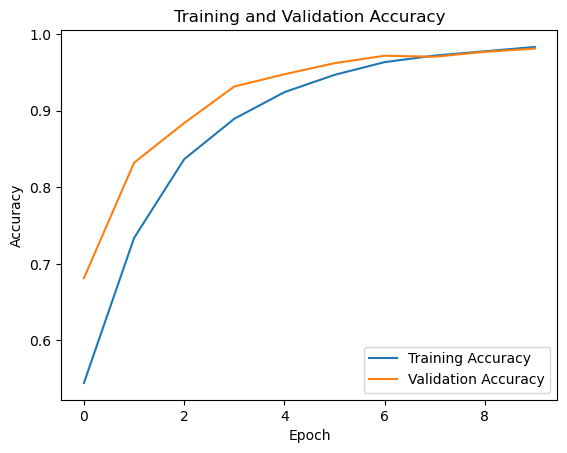

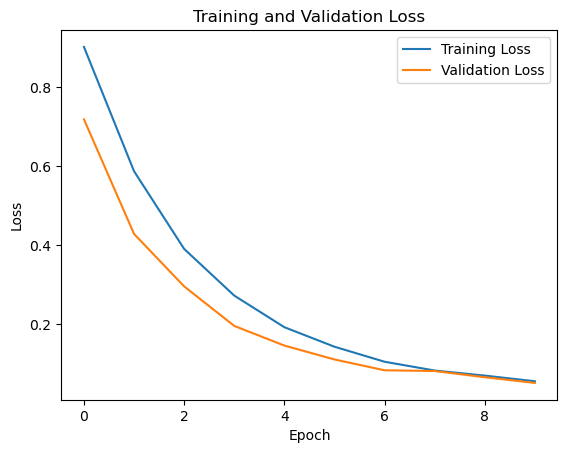

In [33]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [36]:
# Save the model to an HDF5 file
model.save('my_model.h5')

C:\Users\Hasan\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
model.save('my_model.kera')

INFO:tensorflow:Assets written to: my_model.kera\assets


INFO:tensorflow:Assets written to: my_model.kera\assets
